[![preview notebook](https://img.shields.io/static/v1?label=render%20on&logo=github&color=87ce3e&message=GitHub)](https://github.com/open-atmos/PySDM/blob/main/examples/PySDM_examples/Luettmer_homogeneous_freezing/simple_homogenous_freezing_example.ipynb)
[![launch on mybinder.org](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/open-atmos/PySDM.git/main?urlpath=lab/tree/examples/PySDM_examples/Luettmer_homogeneous_freezing/simple_homogenous_freezing_example.ipynb)
[![launch on Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/open-atmos/PySDM/blob/main/examples/PySDM_examples/Luettmer_homogeneous_freezing/simple_homogenous_freezing_example.ipynb)

Simple homogeneous freezing example for testing

In [ ]:
import os, sys
os.environ['NUMBA_THREADING_LAYER'] = 'workqueue'  # PySDM & PyMPDATA don't work with TBB; OpenMP has extra dependencies on macOS
if 'google.colab' in sys.modules:
    !pip --quiet install open-atmos-jupyter-utils
    from open_atmos_jupyter_utils import pip_install_on_colab
    pip_install_on_colab('PySDM-examples', 'PySDM')

In [1]:
from PySDM.physics.constants import si
from PySDM_examples.Luettmer_homogeneous_freezing.commons import run_simulations, hom_pure_droplet_freezing_backend, \
    hom_pure_droplet_freezing_standard_setup
from PySDM_examples.Luettmer_homogeneous_freezing import plot
from matplotlib import pyplot
from open_atmos_jupyter_utils import show_plot

In [2]:
hom_freezing_types_all = [  "KoopMurray2016", "Spichtinger2023", "threshold"  ]
backends = hom_pure_droplet_freezing_backend()
standard = hom_pure_droplet_freezing_standard_setup()

standard["dz"] = 0.5 * si.meter
standard["RH_0"] = 1.
standard["T0"] = 238. * si.kelvin
standard["r_ccn"] = 20. * si.micrometer
standard["n_sd"] = 100
standard["condensation_enable"] = True
standard["deposition_enable"] = False

In [3]:
simulations = []
for hom_freezing_type in hom_freezing_types_all:
    setting_dict = {
        **standard,
       "backend": backends[hom_freezing_type],
       "hom_freezing": hom_freezing_type,
    }
    simulations.append(run_simulations(setting_dict))

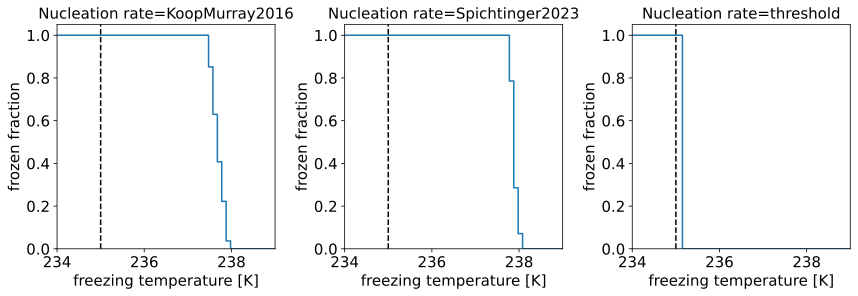

In [4]:
fig, axs = pyplot.subplots(1, 3, figsize=(12, 4), constrained_layout=True)
axs = axs.ravel()
i = 0
for simulation in simulations:
    axs[i] = plot.plot_freezing_temperatures_histogram(axs[i], simulation)
    i += 1
show_plot("fig_simple_hom_freezing_histogram")